In [100]:
from sklearn import datasets as ds
import pandas as pd
import numpy as np
import os, os.path
import mpl_toolkits.mplot3d.axes3d as p3
import matplotlib.pyplot as plt
import colorsys
from PIL import Image

from sklearn.decomposition import KernelPCA
import zipfile

import skimage
from skimage import io

from skimage.transform import resize

In [101]:
with zipfile.ZipFile('train/ALLL/ALL.zip', 'r') as zf:
        zf.extractall('train/ALLL/')
        zf.close()

In [102]:
import glob
from PIL import Image
import matplotlib.image as mpimg

albacore_image_files = glob.glob('train/BET/*.jpg')
# print(image_files)
albacore_image_list = []
size = 300, 300

# for filename in albacore_image_files:
#     image=Image.open(filename).resize(size)
#     albacore_image_list.append(image)
# albacore_image_list

In [103]:
igs = np.array([skimage.transform.resize(skimage.io.imread(fname, as_grey=True, plugin=None, flatten=None),(300,300))
                                         for fname in albacore_image_files])

In [104]:
igs_sk.shape

(200, 300, 300)

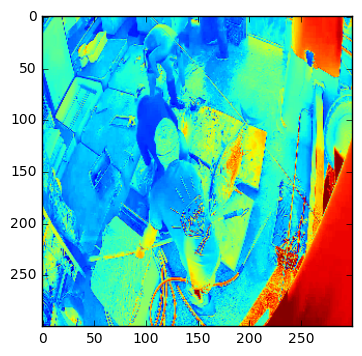

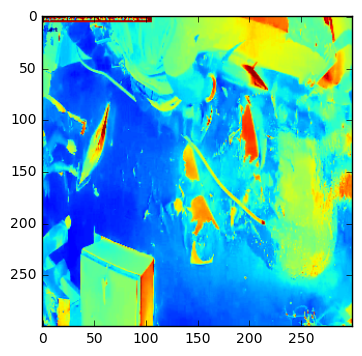

In [105]:
for i in range(0,2):
    plt.imshow(igs[i])
    plt.show()

In [106]:
print(type(igs))
print(igs[0].shape)
igs[0].size

<class 'numpy.ndarray'>
(300, 300)


90000

In [107]:
igs[0].shape

(300, 300)

In [108]:
igs.shape

(200, 300, 300)

In [109]:
train_data = igs.astype('float32')
train_data = train_data / 255
print(train_data.shape)
igs_pca = train_data.reshape(1, (train_data.shape[0]*train_data.shape[1]*train_data.shape[2]))


(200, 300, 300)


In [110]:
n_components = 50
print ("Extracting the top %d eigenfaces from %d faces" % (n_components, igs.shape[0]))

kpca = KernelPCA(n_components=n_components, kernel='rbf', 
                fit_inverse_transform=True, gamma=15) # very sensitive to the gamma parameter
%time kpca.fit(igs_pca)


Extracting the top 50 eigenfaces from 200 faces
CPU times: user 455 ms, sys: 22 ms, total: 477 ms
Wall time: 138 ms


KernelPCA(alpha=1.0, coef0=1, degree=3, eigen_solver='auto',
     fit_inverse_transform=True, gamma=15, kernel='rbf',
     kernel_params=None, max_iter=None, n_components=50,
     remove_zero_eig=False, tol=0)

In [113]:
# lets do some PCA of the features and go from 1850 features to 20 features
from sklearn.decomposition import PCA

n_components = 50
print ("Extracting the top %d eigenfaces from %d faces" % (
    n_components, igs_pca.shape[0]))

pca = PCA(n_components=n_components)
%time pca.fit(igs_pca)
eigenfaces = pca.components_.reshape((n_components, train_data.shape[0]*train_data.shape[1]))

Extracting the top 50 eigenfaces from 1 faces
CPU times: user 324 ms, sys: 44.5 ms, total: 369 ms
Wall time: 209 ms


/Users/rupalsanghavi/anaconda3/lib/python3.5/site-packages/sklearn/decomposition/pca.py:277: RuntimeWarning: invalid value encountered in true_divide
  explained_variance_.sum())


ValueError: total size of new array must be unchanged